In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [42]:
df=pd.read_csv('D://LP-4-DL-DataSet//creditcardfraud-csv//creditcard.csv')

In [43]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
scaler=StandardScaler()
x=scaler.fit_transform(df.drop("Class",axis=1))
y=df["Class"]

In [45]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
input_dim=X_train.shape[1]
print(input_dim)

30


In [52]:
encoder=keras.Sequential([
    keras.layers.Input(shape=input_dim),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='relu')
])

In [58]:
decoder=keras.Sequential([
    keras.layers.Input(shape=(16)),
  keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(input_dim,activation='linear'),
])

In [59]:
autoencoder=keras.Sequential(
[
    encoder,decoder
]
)

In [60]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train,y_train, epochs=5, batch_size=32 ,validation_data=(x_test,y_test))

Epoch 1/5
7121/7121 [==============================] - 9s 1ms/step - loss: 0.0015 - val_loss: 7.9835e-04
Epoch 2/5
7121/7121 [==============================] - 8s 1ms/step - loss: 6.5874e-04 - val_loss: 7.6027e-04
Epoch 3/5
7121/7121 [==============================] - 8s 1ms/step - loss: 5.9833e-04 - val_loss: 5.8886e-04
Epoch 4/5
7121/7121 [==============================] - 8s 1ms/step - loss: 5.5925e-04 - val_loss: 6.1845e-04
Epoch 5/5
7121/7121 [==============================] - 8s 1ms/step - loss: 5.3964e-04 - val_loss: 5.5246e-04


In [61]:
y_pred=autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - y_pred, 2), axis=1)


1781/1781 [==============================] - 1s 728us/step


In [81]:
threshold=np.percentile(mse,95)

In [84]:
anomalies=mse>threshold
num_anomalies=np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 2849


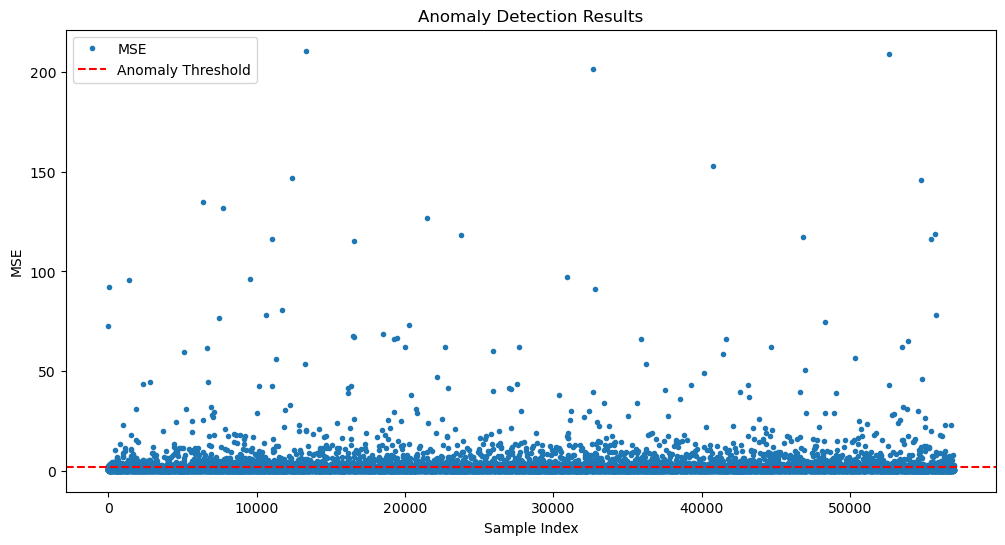

In [85]:
# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

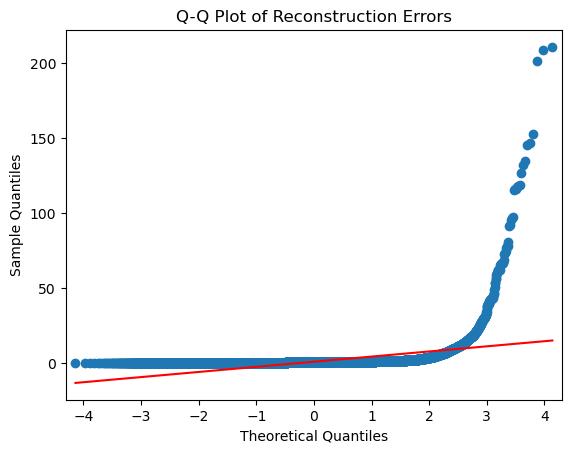

In [79]:
import statsmodels.api as sm

plt.figure(figsize=(8, 6))
sm.qqplot(mse, line='s')
plt.title("Q-Q Plot of Reconstruction Errors")
plt.show()

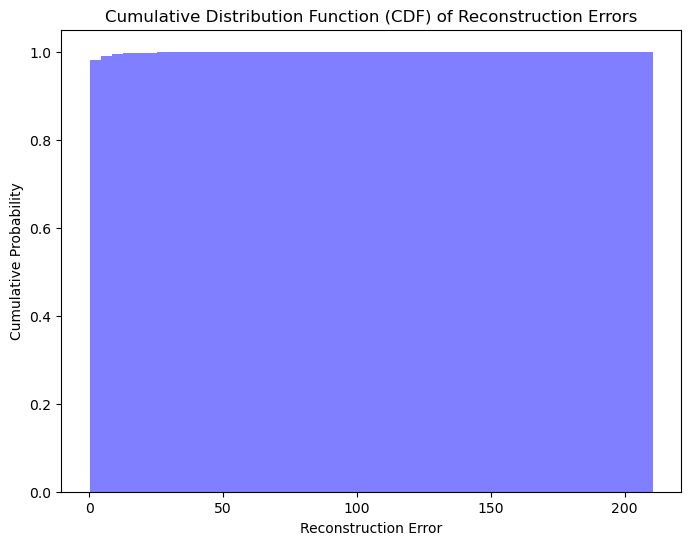

In [80]:
plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(mse, bins=50, cumulative=True, density=True, color='b', alpha=0.5)
plt.xlabel("Reconstruction Error")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF) of Reconstruction Errors")
plt.show()